In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [74]:
rng = np.random.RandomState(1)

In [75]:
X = np.dot(rng.rand(2, 2,), rng.rand(2, 200)).T
# 生成 200行 2列的输入
# 第一列作为x,第二列作为y
X.shape

(200, 2)

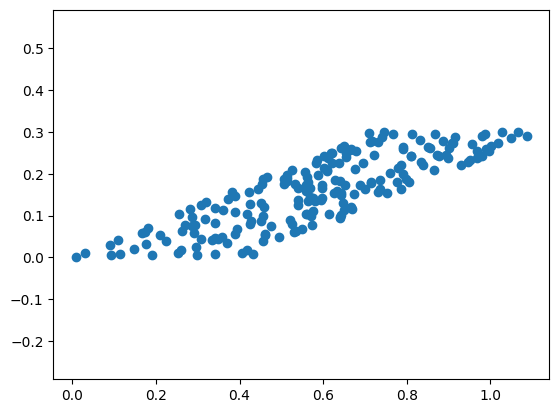

In [76]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [102]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [99]:
pca.explained_variance_

array([0.06022031, 0.00197053])

In [103]:
pca.explained_variance_ratio_

array([0.96831476, 0.03168524])

In [86]:
pca.components_

array([[-0.9534372 , -0.30159162],
       [ 0.30159162, -0.9534372 ]])

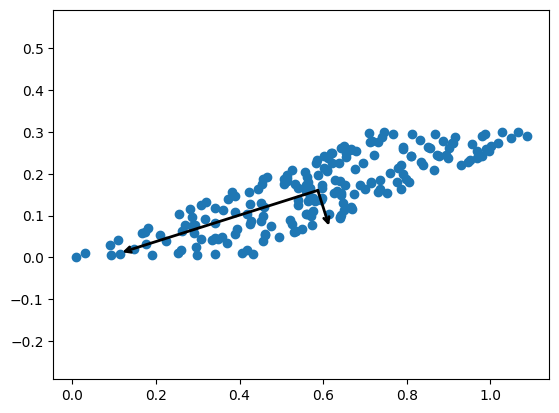

In [106]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrow_props = dict(arrowstyle='->',
                       linewidth=2,
                       shrinkA=0,
                       shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrow_props)

# Plot data
plt.scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    

plt.axis('equal')
plt.show()

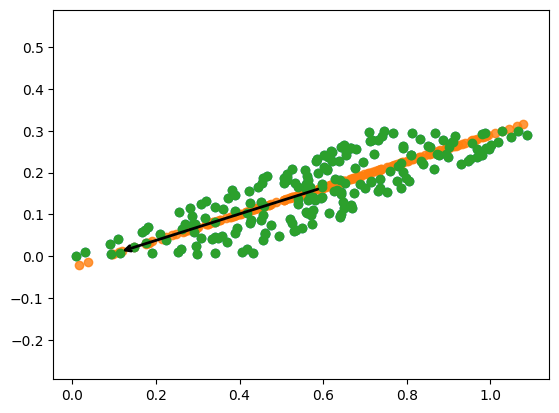

In [114]:
pca = PCA(n_components=1)
pca.fit(X)
# 将二维数据转换为 一维数据，降维
x_pca = pca.transform(X)
# 再将一维数据还原为 二维数据，回不去了，但会尽力模拟二维，变成一条 拟合的直线
x_new = pca.inverse_transform(x_pca)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)

# Plot data
plt.scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')
plt.show()

